In [1]:
import torch
from utils.dataset import get_data_loaders
import hydra
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, compose
import torch
import os
from utils.dataset import get_data_loaders
from models.CNN import CNN
from tqdm import tqdm
from utils.dataset import get_data_loaders
from models.CNN import CNN
import pickle

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA is available. Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA is NOT available. Using CPU.")

hydra.core.global_hydra.GlobalHydra.instance().clear()
with initialize(version_base=None, config_path="../src/configs"):
    cfg = compose(config_name="base", overrides=["project_root=/home/paperspace/DeepEmotion"])
print(cfg)


CUDA is available. Using GPU: Quadro M4000
{'project_root': '/home/paperspace/DeepEmotion', 'verbose': True, 'wandb': True, 'sys_log': True, 'model': 'CNN', 'CNN': {'c1': 16, 'c2': 32, 'c3': 64, 'k1': 3, 'k2': 3, 'k3': 3, 'pk': 2, 'ps': 2, 'kernel_size': 3, 'stride': 1, 'padding': 1}, 'train': {'epochs': 50, 'batch_size': 2, 'shuffle': True, 'train_ratio': 0.8, 'print_label_frequencies': True}, 'data': {'data_path': '${project_root}/data/raw/derivatives/non-linear_anatomical_alignment', 'zarr_dir_path': '${project_root}/zarr_datasets', 'zarr_path': '${project_root}/zarr_datasets/pool_emotions', 'label_path': '${project_root}/data/updated_annotations/pooled_annotations_structured.tsv', 'sessions': ['02'], 'file_pattern_template': '*_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadNL_run-{}_bold.nii.gz', 'subjects': ['sub-01'], 'session_offsets': [0, 902, 1784, 2660, 3636, 4560, 5438, 6522], 'emotion_idx': {'NONE': 0, 'HAPPINESS': 1, 'FEAR': 2, 'SADNESS': 3, 'LOVE': 4, 'ANGER': 

Shape of an image is: (132, 175, 48)


/tmp/ipykernel_4725/600324334.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


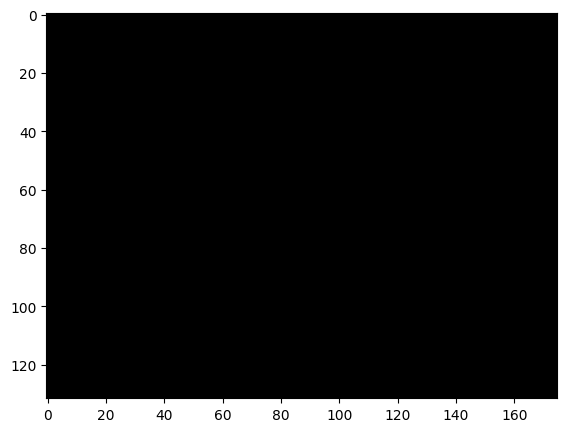

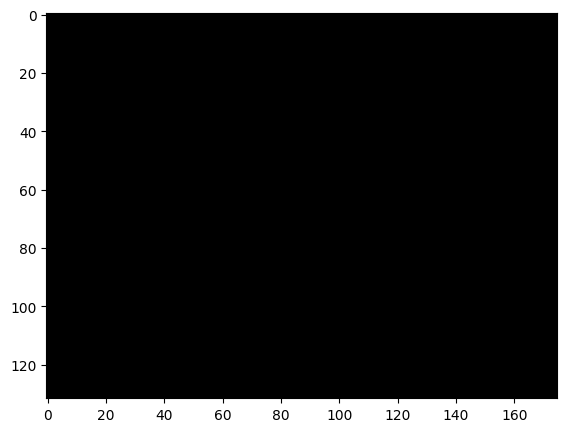

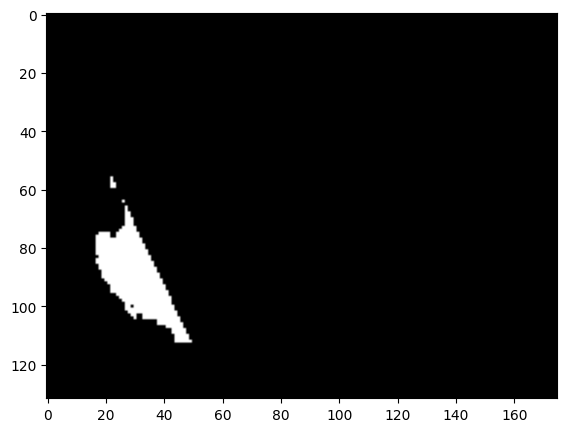

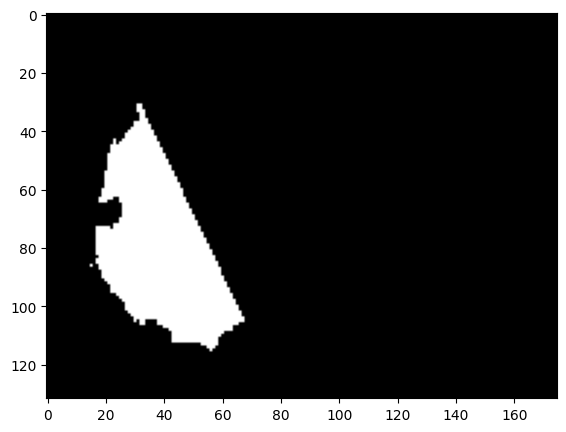

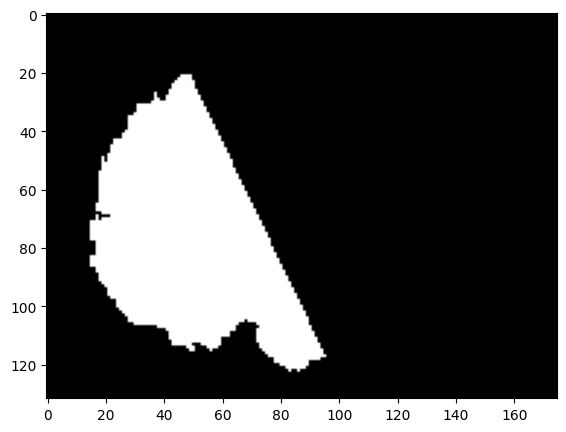

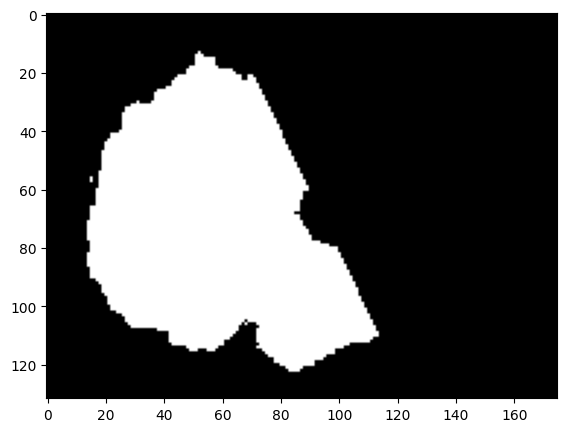

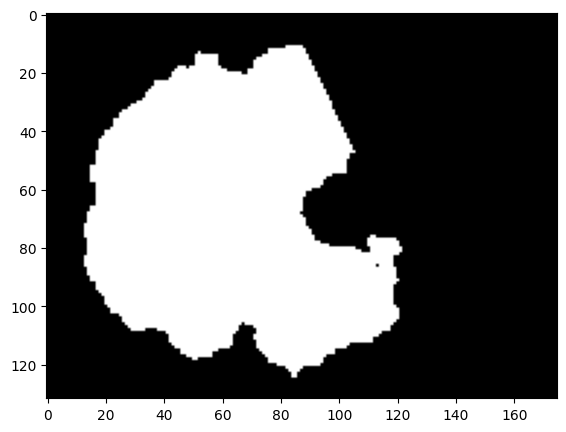

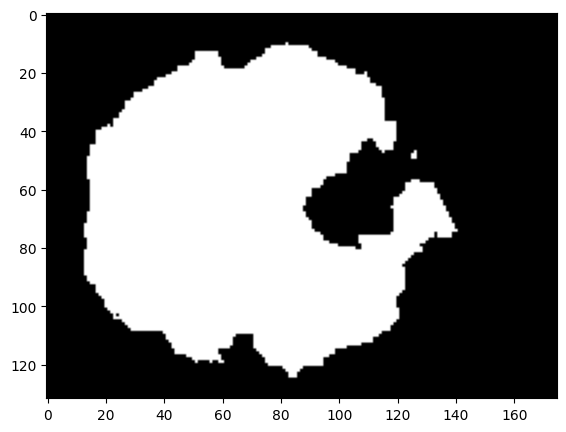

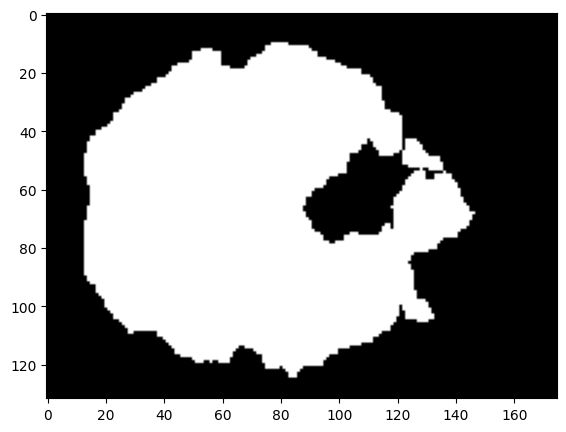

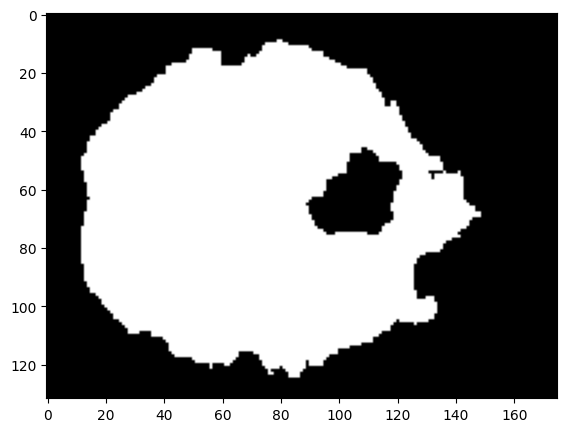

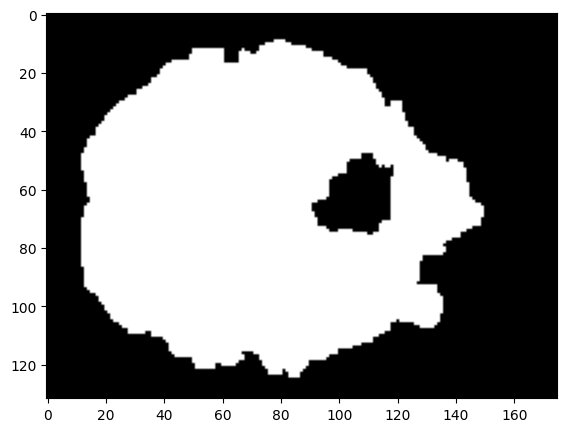

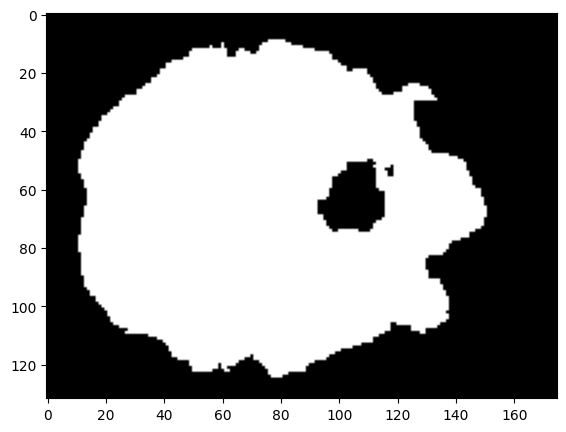

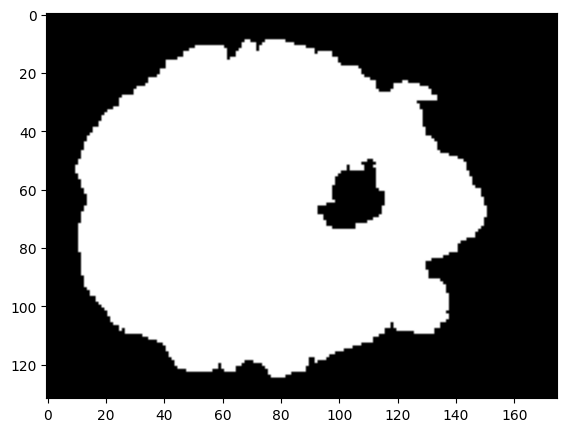

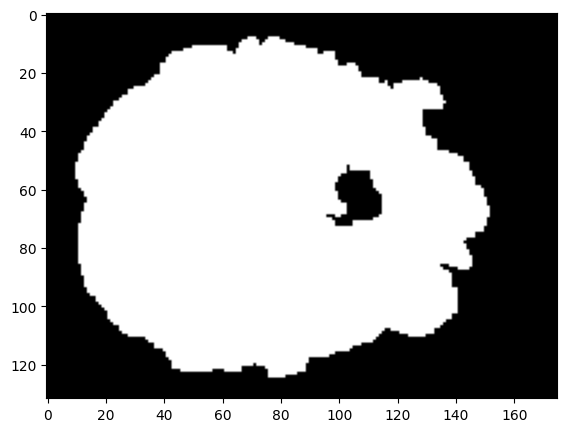

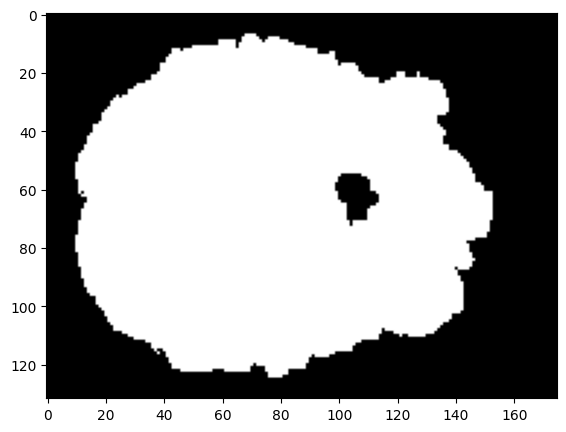

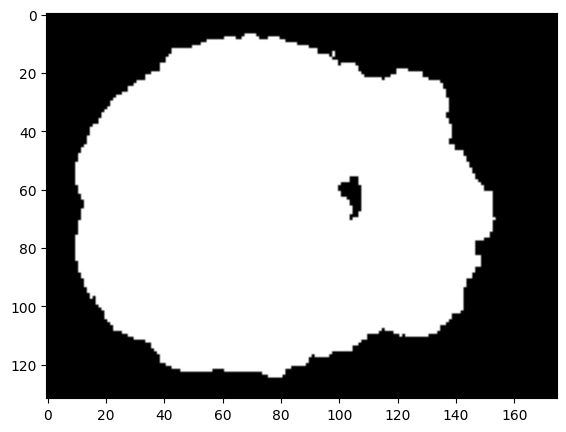

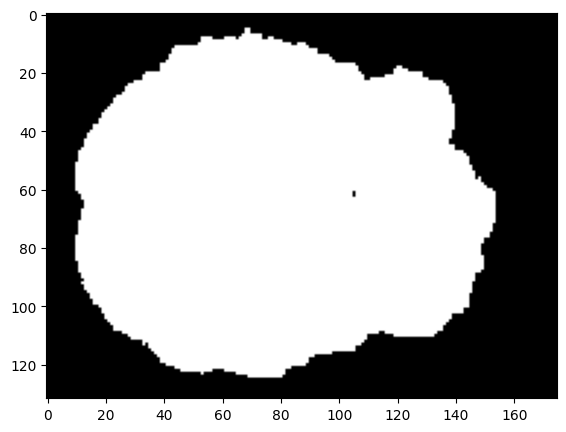

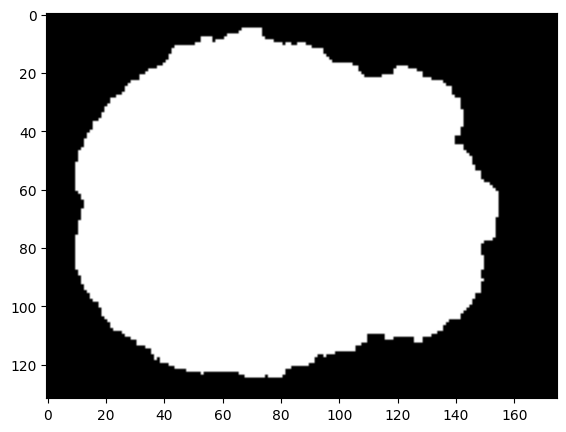

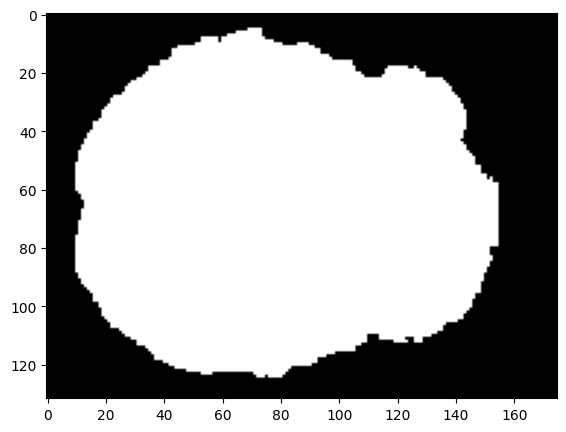

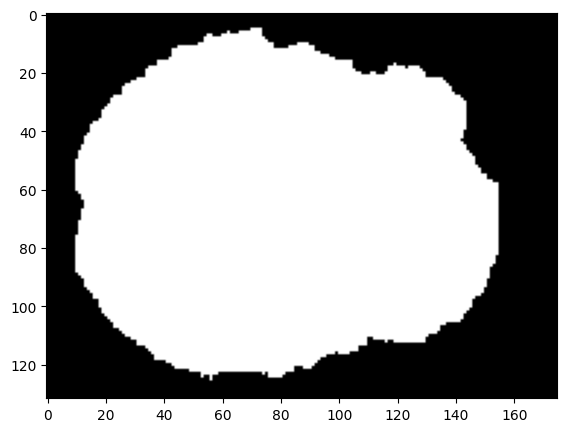

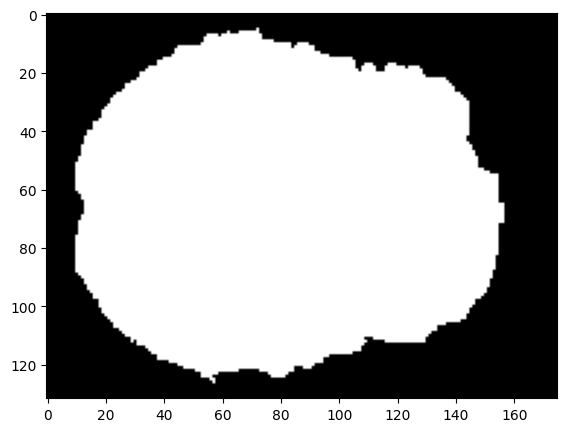

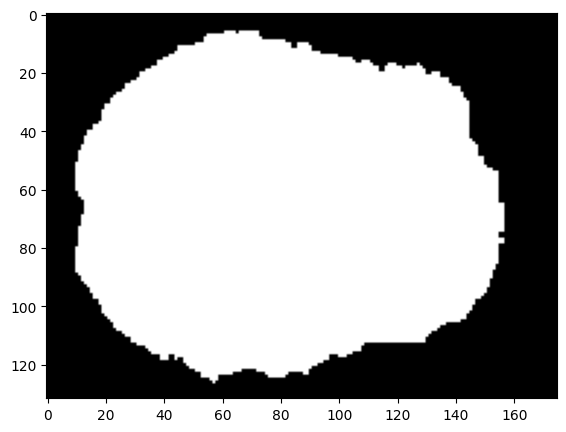

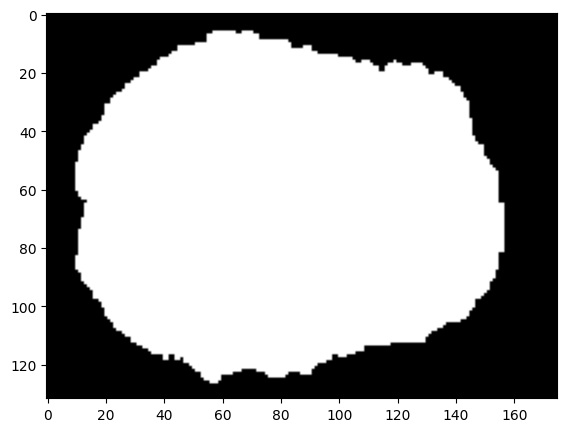

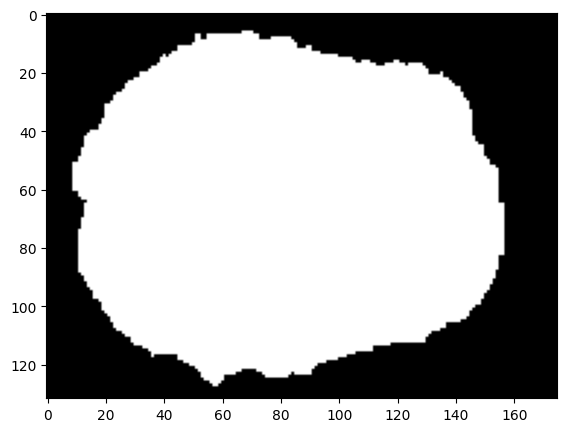

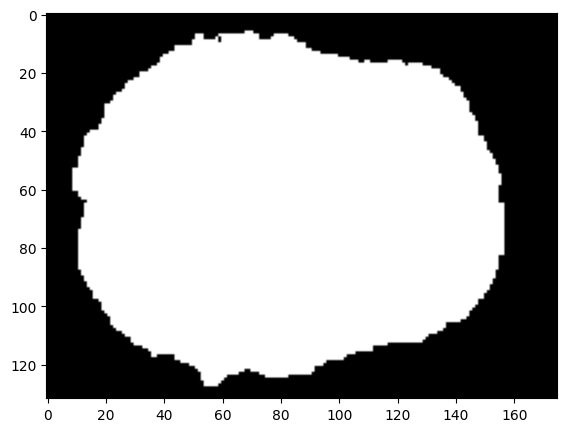

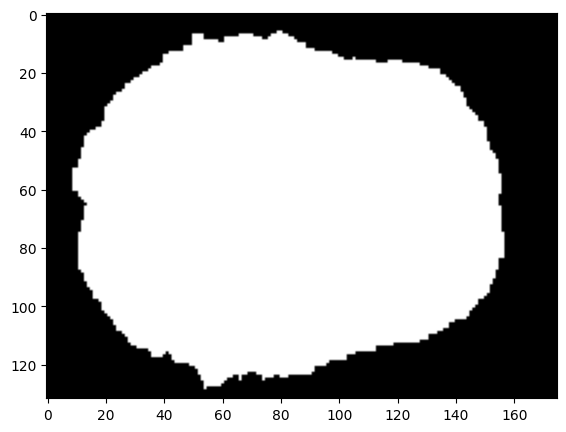

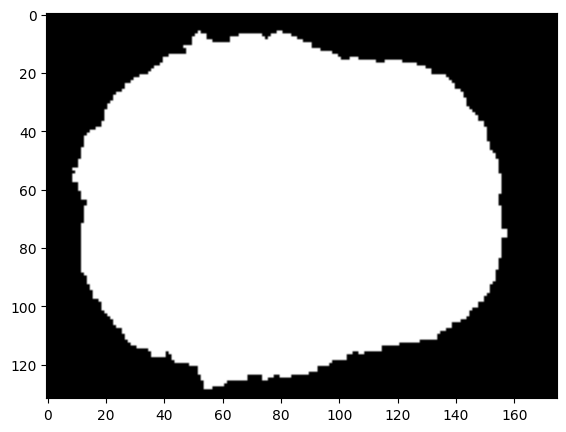

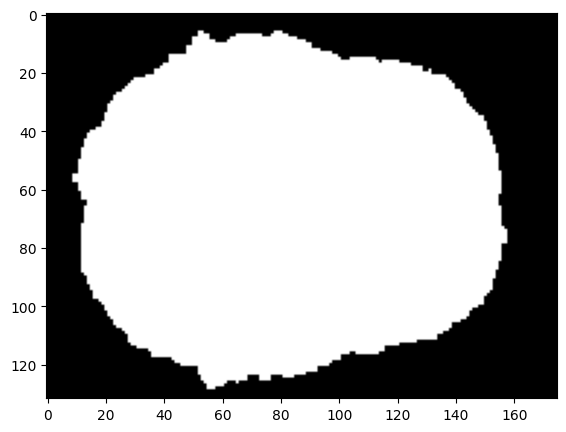

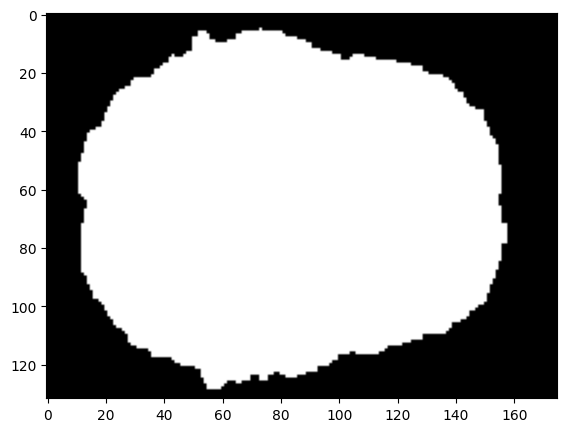

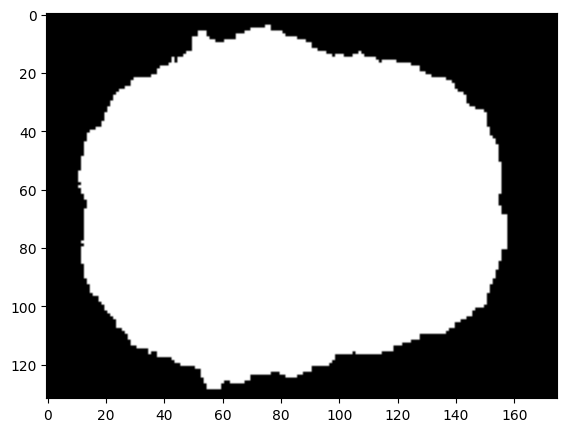

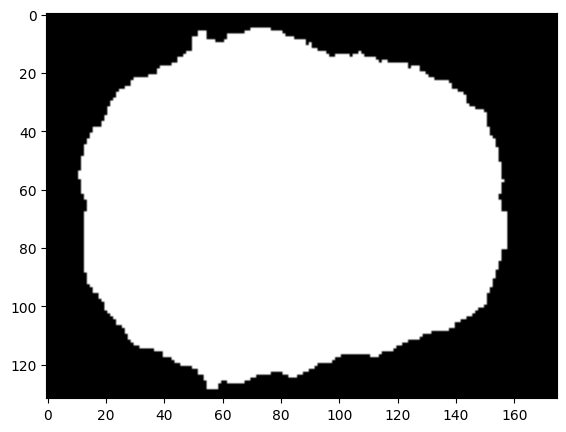

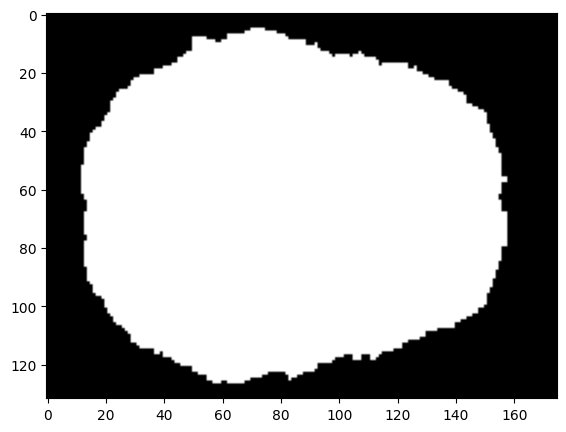

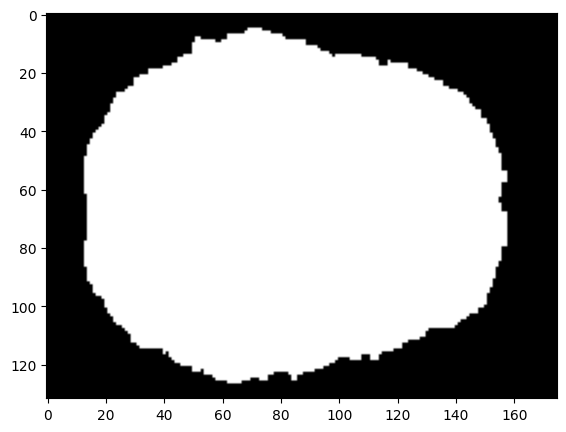

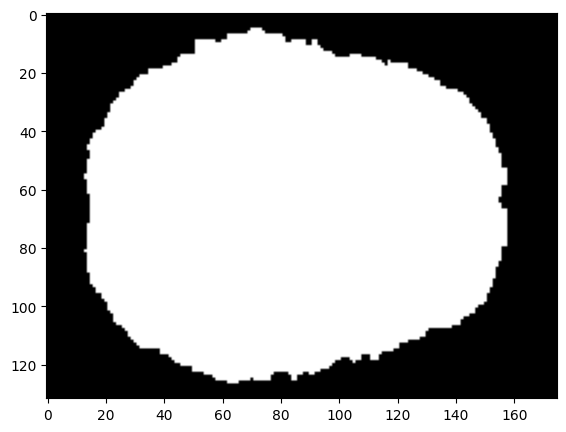

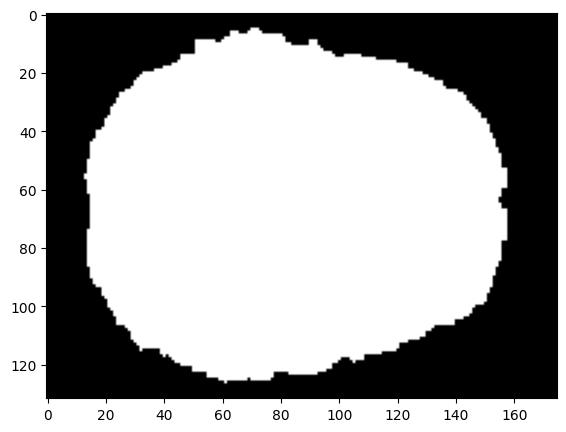

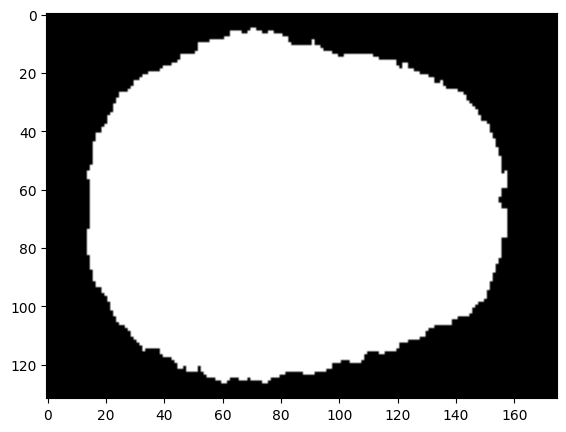

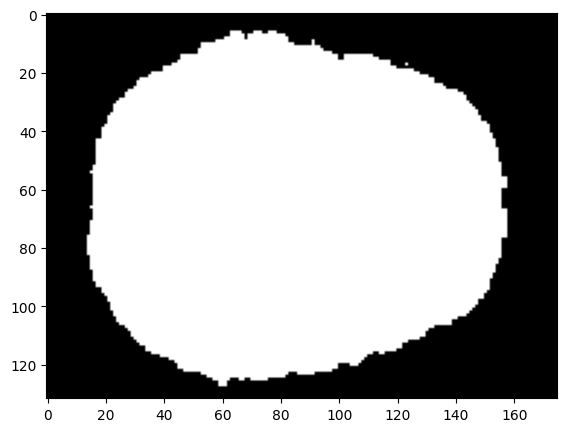

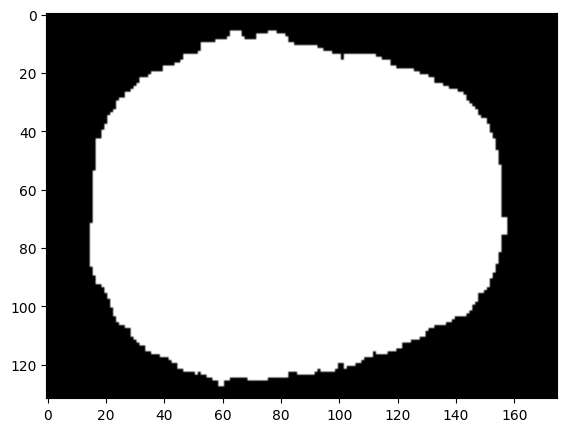

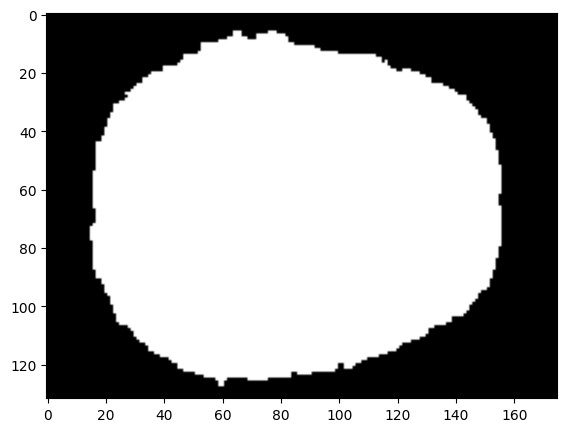

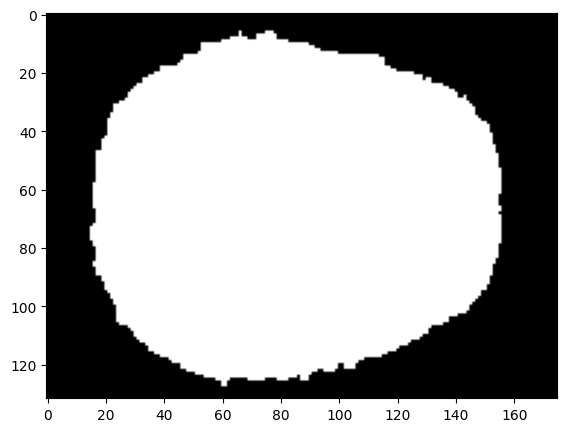

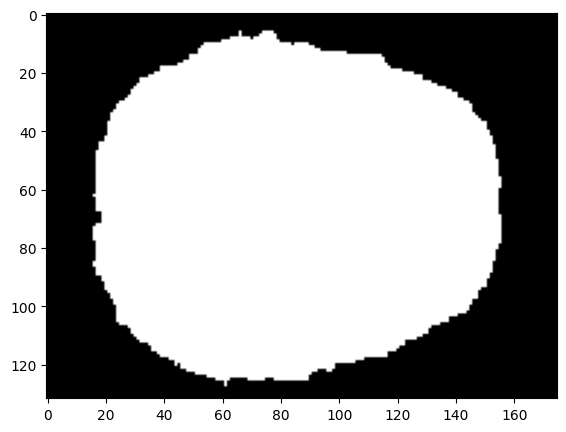

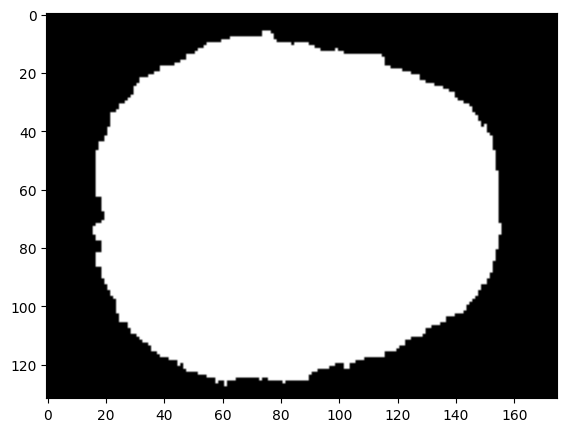

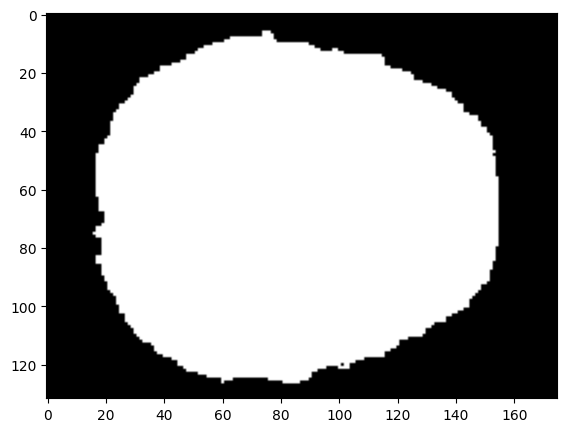

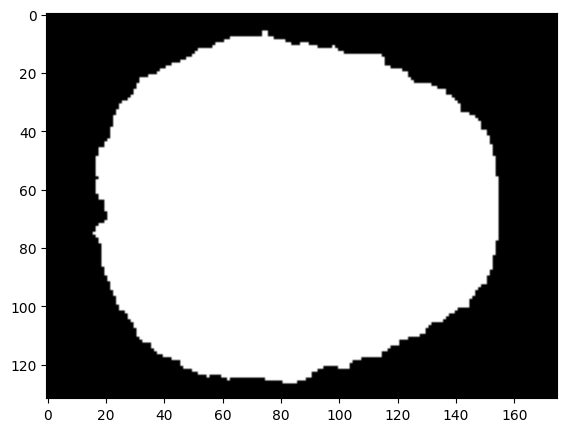

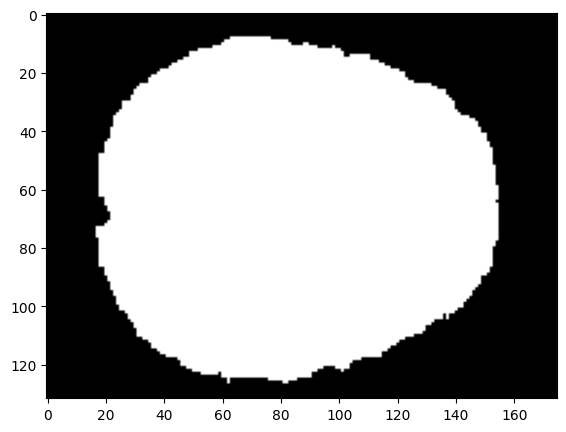

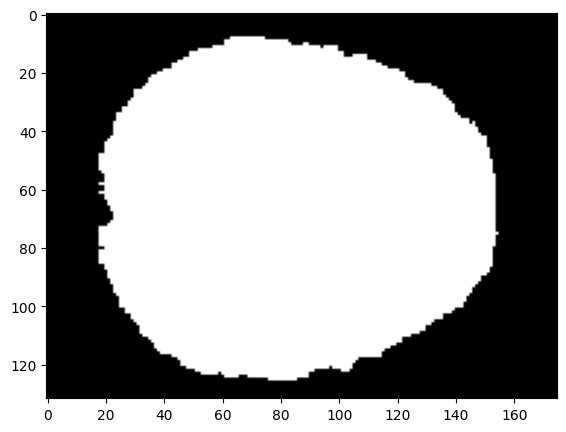

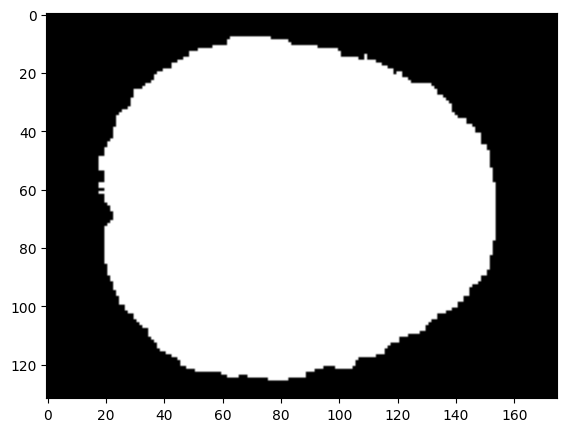

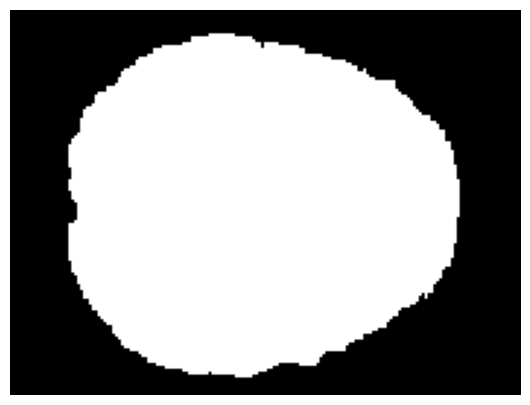

Information about the NIfTI file:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 132 175  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.2  1.2  1.2  1.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'FSL5.0')
aux_file        : np.bytes_(b'')
qform_code      : aligned
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x   

In [12]:
import nibabel as nib
import pandas as pd
import os
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath("../")

sample_img_path = "data/raw/derivatives/non-linear_anatomical_alignment/sub-01/ses-forrestgump/func/sub-01_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadNL_run-01_bold.nii.gz"
sample_mask_path = "data/raw/derivatives/non-linear_anatomical_alignment/sub-01/ses-forrestgump/func/sub-01_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadBrainMaskNLBrainMask_run-01_bold.nii.gz"
file_path = os.path.join(PROJECT_ROOT, sample_img_path)
mask_path = os.path.join(PROJECT_ROOT, sample_mask_path)

def get_nii_mask():
    mask = nib.load(mask_path)
    mask_data = mask.get_fdata() 
    shape = mask_data.shape
    print(f"Shape of an image is: {shape}")
    
    for i in range(shape[-1]):
        plt.figure(figsize=(10, 5))
        data = mask_data[:, :, i]
        plt.imshow(data, cmap='gray')
    plt.axis('off')
    plt.show()

    print("Information about the NIfTI file:")
    print(mask.header)
    
get_nii_mask()

In [ ]:
data_path = "data/raw/derivatives/non-linear_anatomical_alignment/"

os.path.join(PROJECT_ROOT, data_path)

Volume shape: (132, 175, 48, 451)
Mask shape: (132, 175, 48)
Volume vector [[[[ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   ...
   [10. 10. 11. ...  9. 10. 10.]
   [ 9. 10. 10. ...  9. 11. 11.]
   [12. 10. 11. ... 10. 11. 10.]]

  [[ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   ...
   [ 9.  9. 10. ...  9. 10.  9.]
   [ 9. 10. 10. ...  9. 11. 10.]
   [11. 10. 10. ... 10. 11. 10.]]

  [[ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   ...
   [ 9. 10. 10. ... 10. 10.  9.]
   [ 9. 11. 11. ... 10. 11. 11.]
   [11. 10. 10. ... 11. 11. 10.]]

  ...

  [[ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   ...
   [11. 12. 10. ... 11. 10. 10.]
   [10. 10. 10. ... 10. 10. 10.]
   [ 9.  9.  9. ...  9.  9.  9.]]

  [[ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0.  0.  0.]
   [ 0.  0.  0. ...  0. 

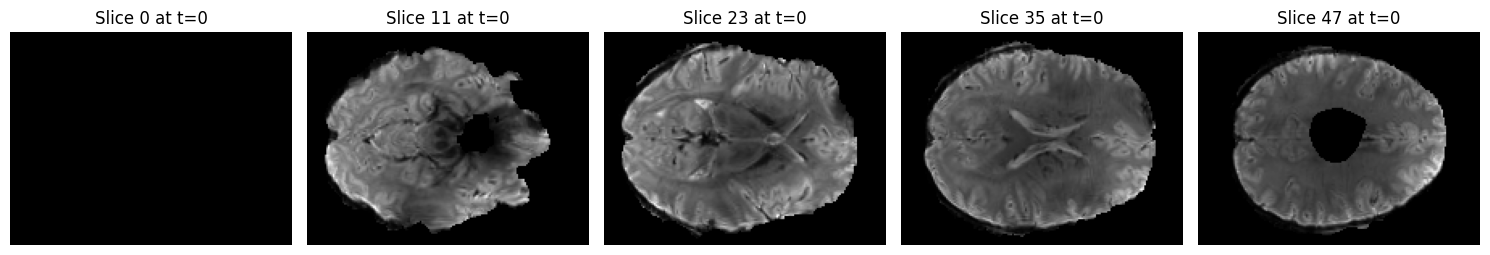

In [6]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define project root and file paths
PROJECT_ROOT = os.path.abspath("../")
sample_img_path = "data/raw/derivatives/non-linear_anatomical_alignment/sub-01/ses-forrestgump/func/sub-01_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadNL_run-01_bold.nii.gz"
sample_mask_path = "data/raw/derivatives/non-linear_anatomical_alignment/sub-01/ses-forrestgump/func/sub-01_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadBrainMaskNLBrainMask_run-01_bold.nii.gz"
file_path = os.path.join(PROJECT_ROOT, sample_img_path)
mask_path = os.path.join(PROJECT_ROOT, sample_mask_path)

# Load the volume and the mask
try:
    img = nib.load(file_path)
    volume = img.get_fdata(dtype=np.float32)  # Expected shape: (x, y, z, t)
    mask_img = nib.load(mask_path)
    mask = mask_img.get_fdata(dtype=np.float32)  # Expected shape: (x, y, z)

    print(f"Volume shape: {volume.shape}")
    print(f"Mask shape: {mask.shape}")

    # Ensure the mask has a time dimension for broadcasting (if not already)
    if mask.ndim == 3:
        mask = mask[..., np.newaxis]  # Now shape becomes (x, y, z, 1)

    # Precompute the masked volume (element-wise multiplication)
    
    print(f"Volume vector {volume} and type {type(volume)}")
    print(f"Volume vector {mask} and type {type(volume)}")
    masked_volume = volume * mask
    print(f"Masked volume shape: {masked_volume.shape}")

    timepoint = 0  # Change this if needed

    num_z_slices = masked_volume.shape[2]
    slices_to_show = np.linspace(0, num_z_slices - 1, 5, dtype=int) # Show 5 evenly spaced slices

    plt.figure(figsize=(15, 8)) # Adjust figure size for better visualization
    for i, slice_idx in enumerate(slices_to_show):
        plt.subplot(1, len(slices_to_show), i + 1) # Create subplots for each slice
        # Display the slice from the masked volume at the chosen timepoint
        plt.imshow(masked_volume[:, :, slice_idx, timepoint], cmap='gray')
        plt.title(f"Slice {slice_idx} at t={timepoint}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: One or both of the specified files were not found.")
    print(f"Image file path: {file_path}")
    print(f"Mask file path: {mask_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Suppose cfg.data.emotion_idx maps something like { "happy": 0, "sad": 1, ... }
# We'll create a dict to hold a list of gradients for each class:
class_gradients = {
    idx: [] for emotion, idx in cfg.data.emotion_idx.items() if emotion != "NONE"
}

# Config variables
PROJECT_ROOT = os.path.abspath("../")

cfg = OmegaConf.create({
    "project_root": PROJECT_ROOT,
    "verbose": True,
    "wandb": True,
    "sys_log": True,
    "model": "CNN",
    "CNN": {
        "c1": 16, "c2": 32, "c3": 64, "k1": 3, "k2": 3, "k3": 3,
        "pk": 2, "ps": 2, "kernel_size": 3, "stride": 1, "padding": 1
    },
    "train": {
        "epochs": 50, "batch_size": 10, "shuffle": True, "train_ratio": 0.8,
        "print_label_frequencies": True
    },
    "data": {
        "data_path": f"{PROJECT_ROOT}/data/raw/derivatives/non-linear_anatomical_alignment",
        "zarr_dir_path": f"{PROJECT_ROOT}/zarr_datasets",
        "zarr_path": f"{PROJECT_ROOT}/zarr_datasets/pool_emotions",
        "label_path": f"{PROJECT_ROOT}/data/updated_annotations/pooled_annotations_structured.tsv",
        "sessions": ["01", "02", "03", "04", "05", "06", "07", "08"],
        "file_pattern_template": "*_ses-forrestgump_task-forrestgump_rec-dico7Tad2grpbold7TadNL_run-{}_bold.nii.gz",
        "subjects": ["sub-1"],
        "session_offsets": [0, 902, 1784, 2660, 3636, 4560, 5438, 6522],
        "emotion_idx": {"NONE": 0, "HAPPINESS": 1, "FEAR": 2, "SADNESS": 3, "LOVE": 4, "ANGER": 5},
        "normalization": False,
        "weight_decay": 0,
        "learning_rate": 0.0001,
        "seed": 42,
        "save_model": True,
        "load_model": False,
        "save_model_path": "output/models",
        "load_model_path": f"{PROJECT_ROOT}/src/output/models/sub_ALL.pth",
        "output_csv_path": f"{PROJECT_ROOT}/src/output/PCA/hidden/sub_ALL.csv"
    }
})

# Load dataloaders
train_dataloader, val_dataloader = get_data_loaders(cfg)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(cfg=cfg, output_dim=len(cfg.data.emotion_idx))
model.load_state_dict(torch.load(cfg.data.load_model_path, map_location=device))
model.to(device)
model.eval()

for batch_idx, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
    # [B, C, D, H, W] or [B, D, H, W], whichever your model expects
    data = batch["data_tensor"].float().to(device, non_blocking=True)
    labels = batch["label_tensor"].long().to(device, non_blocking=True)

    # We want gradient wrt the input, so mark it as requires_grad
    data.requires_grad_(True)
    
    # Forward pass
    logits = model(data)  # shape [B, num_classes]
    
    for i in range(data.size(0)):
        # Zero out grads for each sample so they don’t accumulate
        model.zero_grad()
        if data.grad is not None:
            data.grad.zero_()
        
        # Identify the true label for sample i
        label_i = labels[i].item()

        # Grad-CAM style usually calls backward on the class score we care about.
        # We'll do exactly that for the ground-truth class:
        logits[i, label_i].backward(retain_graph=True)

        # data.grad now has gradient of that class score wrt the input
        grad_i = data.grad[i].detach().cpu().clone()  # store a copy in CPU memory

        class_gradients[label_i].append(grad_i)

    # Turn off .requires_grad to avoid keeping references around
    data.requires_grad_(False)

# Now class_gradients[k] is a list of per-sample gradients for class k
# You can convert them to a single tensor if desired:
# Remove or skip classes that have no gradient samples
keys_to_remove = []
for k in class_gradients.keys():
    if len(class_gradients[k]) == 0:
        keys_to_remove.append(k)

for k in keys_to_remove:
    del class_gradients[k]

# Now stack the non-empty lists
for k in class_gradients.keys():
    class_gradients[k] = torch.stack(class_gradients[k])

# At this point, `class_gradients` is a dictionary of tensors you can use or save.
# Each key is the class index, and each value is a tensor of that class’s gradients.

output_path = "/home/paperspace/DeepEmotion/output/Gradcam/class_gradients.pkl"

# Make sure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the dictionary
with open(output_path, 'wb') as f:
    pickle.dump(class_gradients, f)